<a href="https://colab.research.google.com/github/MathewsJosh/mecanica-estruturas-ufjf/blob/main/%5BMAC023%5D_Trabalho_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MAC023 - Mecânica das Estruturas**

# ME-03 - Terceira Avaliação de Conhecimentos

Alunos: 

Brian Maia \\
Mathews Edwirds \\

# Condições Gerais

Esta avaliação tem como objetivo avaliar os conhecimentos adquiridos na primeira parte da disciplina de Mecânica das Estruturas.


---

As condicões abaixo devem ser observadas: 

1. Serão formadas equipes e cada uma delas com no mínimo **2** e no máximo **3** integrantes. 

2. A avaliação será realizada por meio da entrega de uma cópia deste notebook com as soluções desenvolvidas até a data estipulada de entrega.


3. Da entrega da avaliação.
  * Os documentos necessários para a entrega do trabalho são (1) os códigos  desenvolvidos pela equipe e (2) vídeo com a descrição da solução. 
  * A equipe deve usar este modelo de notebook para desenvolver os códigos. 
  * Os códigos podem ser desenvolvidos combinado a linguagem LaTeX e computação simbólica ou computação numérica quando necessário.
  * Os gráficos necessários para a apresentação da solução devem estar embutidos no notebook.

4. Da distribuição das questões.
  * A quantidade de questões será a mesma para cada grupo. 
  * Serão atribuídas as mesmas questões para todos os grupos.
  * A pontuacão referente a cada questão será igualitária e o valor total da avaliação será 100 pontos.

5. As equipes devem ser formadas até às **23:59 horas o dia 22/02/2022** por meio do preenchimento da planilha [[MAC023] Formação das Equipes](https://docs.google.com/spreadsheets/d/1Dlftymao970nnrE4mu958iP8nMqKqSuhHiiLH91BKpQ/edit#gid=986079240).

6. A formação das equipes pode ser acompanhada arquivo indicado acima. Cada equipe será indentificada por uma letra em ordem alfabética seguida do número 3 (A3, B3, C3, e assim por diante). O arquivo está aberto para edição e pode ser alterado pelos alunos até a data estipulada.

7. Equipes formadas após a data estabelecida para a formação das equipes terão a nota da avaliação multiplicada por um coeficiente de **0.80**.

8. A equipe deve indicar no arquivo de indicação de equipes um responsável pela entrega do projeto. 
  * Somente o responsável pela entrega deve fazer o upload do arquivo na plataforma

9. A entrega dos projetos deve ocorrer até às **23:59 do dia 25/02/2022** na plataforma da disciplina pelo responsável pela entrega. 
  * Caso a entrega seja feita por outro integrante diferente daquele indicado pela pela equipe a avaliação será desconsiderada e não será corrigida até que a a condição de entrega seja satisfeita.

10. Quaisquer dúvidas ou esclarecimentos devem ser encaminhadas pela sala de aula virtual.



## (Q1) Implementação do método dos deslocamentos

Considere a estrutura abaixo de seção transversal retangular com 8 cm de base por 15 cm de altura. O material possui módulo de elasticidade de 70 GPa. Caso necessário, considere o coeficiente de Poisson igual a 0,30.



Proceda como se pede:

1. Enumere os graus de liberdade da estrutura
2. Determine os graus de liberdade associados as deslocabilidades
3. Determine a matriz de rigidez do membro AC
4. Determine a matriz de rigidez do membro CD
5. Determine a matriz de rigidez do membro DB
6. Determine a matriz de rigidez global da estrutura
7. Apresente os deslocamentos horizontal, vertical e a rotação do ponto C.


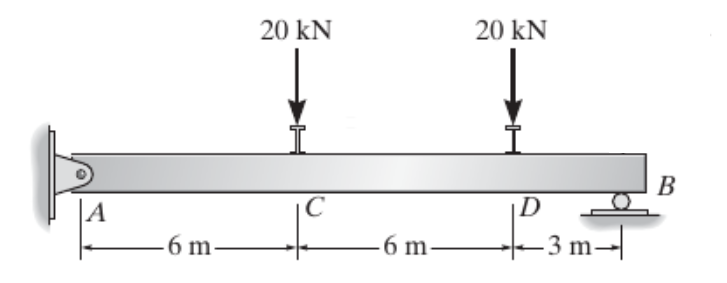

In [ ]:
import numpy as np
import sympy as sp
sp.init_printing(use_latex=True)

# Leitura do arquivo de dados

In [ ]:
# leitura do arquivo de entrada
from io import BytesIO
import pandas as pd
import requests

# acesso via link
link='https://docs.google.com/spreadsheet/ccc?key=1ZBDTypR4MOZqEiIXDqxt2JfW2Oy20SYoNsi2QHJjxKk&output=csv'

r = requests.get(link)
data = r.content
    
df = pd.read_csv(BytesIO(data), header=0) #, index_col=0
df

,MAC023 - Estrutura do trabalho 03,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,4,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0.000000e+00,0.000000,0.0,1.0,1.0,0.0
2,1,6.000000e+00,0.000000,0.0,0.0,0.0,0.0
3,2,1.200000e+01,0.000000,0.0,0.0,0.0,0.0
4,3,1.500000e+01,0.000000,0.0,0.0,1.0,0.0
5,1,NaN,NaN,NaN,NaN,NaN,NaN
6,0,7.000000e+07,0.300000,NaN,NaN,NaN,NaN
7,1,NaN,NaN,NaN,NaN,NaN,NaN
8,0,1.200000e-02,0.000023,NaN,NaN,NaN,NaN
9,3,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#
# Variáveis do programa -- descreva os nomes das variáveis
#

# numnp          : número de pontos nodais
# neq            : número de equações
# coord          : coordenadas nodais
# idx            : array com os índices das equações
# nummat         : número de materiais

# E              : módulo de elasticidade
# nu             : coeficiente de poisson
# gp             : matriz com os dados definidos para cada uma das seções transversais
# nlcase         : número de casos de carregamento
# f              : vetor de forças nodais (global)
# matp           : propriedades dos materiais (A, E)
# conec          : matriz de conectividades
# geop           : array com as propriedades geométricas (A, I)
# numgp          : número de seções geométricas

# Informação dos nós, suas coordenadas e as condições de deslocabilidade

In [ ]:
k=0
numnp = int(df.iloc[k,0])
coord=np.zeros((numnp,3))
idx=np.zeros((numnp,3), int)
k+=1

print("Número de nós da estrutura: {}".format(numnp))
print("Matriz com coordenadas (x,y,z) de cada um dos nós: \n{}".format(coord))
print("Matriz de possíveis deslocamentos em cada uma das direções x,y,z: \n{}".format(idx))

Número de nós da estrutura: 4
Matriz com coordenadas (x,y,z) de cada um dos nós: 
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Matriz de possíveis deslocamentos em cada uma das direções x,y,z: 
[[0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]


In [ ]:
for i in range(numnp):
  print(df.iloc[k+i,:].values)
  v = df.iloc[k+i,:].values
  node=int(v[0])
  x,y,z = v[1:4]
  coord[node,:] =  v[1:4]
  idx[node,:] =  [ int(j) for j in v[4:7] ]

[0. 0. 0. 0. 1. 1. 0.]
[1. 6. 0. 0. 0. 0. 0.]
[ 2. 12.  0.  0.  0.  0.  0.]
[ 3. 15.  0.  0.  0.  1.  0.]


In [ ]:
display(numnp, coord, idx)

array([[ 0.,  0.,  0.],
       [ 6.,  0.,  0.],
       [12.,  0.,  0.],
       [15.,  0.,  0.]])

array([[1, 1, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 1, 0]])

# Leitura das propriedades dos materiais

In [ ]:
k=1
k=k+numnp
nummat=df.iloc[k,0]
Ey=np.zeros(nummat)
nu=np.zeros(nummat)

print("Posicionamento na linha correta do arquivo: k={}".format(k))
print("Número de materiais definidos no arquivo de entrada de dados: {}".format(nummat))
print("Módulo de elasticidade para os materiais definidos: {}".format(Ey))
print("Coeficiente de Poisson para os materiais definidos: {}".format(nu))

k+=1

Posicionamento na linha correta do arquivo: k=5
Número de materiais definidos no arquivo de entrada de dados: 1
Módulo de elasticidade para os materiais definidos: [0.]
Coeficiente de Poisson para os materiais definidos: [0.]


In [ ]:
for i in range(nummat):
  v=df.iloc[k+i].values  # linha do arquivo referente a um material: contém o módulo de elasticidade e o coeficiente de Poisson definido para o mesmo
  print(v)
  j=int(v[0])-1     # redução de uma unidade para alocação dos dados em estrutura interna
  Ey[j]=v[1]      # módulo de elasticidade do material correspondente
  nu[j]=v[2] 

[0.e+00 7.e+07 3.e-01    nan    nan    nan    nan]


# Leitura das informações das seções transversais 

In [ ]:
k=6
k=k+nummat
numgp = df.iloc[k,0]
gp=np.zeros((numgp,2))
k+=1

In [ ]:
for i in range(numgp):
  v=df.iloc[k+i].values
  print(v)
  j=int(v[0])-1
  gp[j]=v[1:3] 

[0.00e+00 1.20e-02 2.25e-05      nan      nan      nan      nan]


# Leitura e armazenamento das informações dos elementos

In [ ]:
k=8
k = k+numgp
nume = df.iloc[k,0]
conec=np.zeros((nume,2))
matp=np.zeros(nume)
geop=np.zeros(nume)
k+=1

print("Vetor de nós que conectam a barra: {}".format(conec))
print("Vetor que associa material à barra: {}".format(matp))
print("Vetor que associa seção à barra: {} \n\n".format(geop))

for i in range(nume):
  v=df.iloc[k+i].values
  conec[i,0] = v[1]
  conec[i,1] = v[2]
  matp[i] = v[3]
  geop[i] = v[4]

print("Vetor de nós que conectam a barra: \n{}".format(conec))
print("Vetor que associa material à barra: \n{}".format(matp))
print("Vetor que associa seção à barra: \n{}".format(geop))

Vetor de nós que conectam a barra: [[0. 0.]
 [0. 0.]
 [0. 0.]]
Vetor que associa material à barra: [0. 0. 0.]
Vetor que associa seção à barra: [0. 0. 0.] 


Vetor de nós que conectam a barra: 
[[0. 1.]
 [1. 2.]
 [2. 3.]]
Vetor que associa material à barra: 
[0. 0. 0.]
Vetor que associa seção à barra: 
[0. 0. 0.]


# Contabilização do número de graus de liberdade do problema e como resultado temos o número de equações do sistema linear associado

In [ ]:
neq=0
for n in range(numnp):
  # Para cada um dos possíveis deslocamentos representados
  # O vetor 'idx' armazena, agora, os índices dos graus de 
  # liberdade com relação ao referencial global
  for i in range(3): 
    if idx[n,i]==0:
      idx[n,i]=neq
      neq+=1
    else:
      idx[n,i]=-1

In [ ]:
display(neq, idx)

array([[-1, -1,  0],
       [ 1,  2,  3],
       [ 4,  5,  6],
       [ 7, -1,  8]])

# Leitura e armazenamento dos dados de carregamento nodal

In [ ]:
k=10
k = k + nume
nload = df.iloc[k,0]
node  = np.zeros(nload)
idirn = np.zeros(nload)
fload = np.zeros(nload)

nlcase=1
r=np.zeros((neq,nlcase))
k+=1

print("Nós em que as cargas do caso correspondente serão aplicadas: \n{}".format(node))
print("Direções de aplicação válidas de cada carga: \n{}".format(idirn))
print("Magnitude das cargas aplicadas em cada uma das direções principais: \n{}".format(fload))
print("Vetor de cargas no referencial global: \n{}".format(r))

Nós em que as cargas do caso correspondente serão aplicadas: 
[0. 0.]
Direções de aplicação válidas de cada carga: 
[0. 0.]
Magnitude das cargas aplicadas em cada uma das direções principais: 
[0. 0.]
Vetor de cargas no referencial global: 
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


# Processamento das carga nodais, transformando a informação local em informação global

In [ ]:
k=14
l=0
r=np.zeros((neq,nlcase))
for i in range(nload):
  v=df.iloc[k+i].values                               # nó, Fx, Fy, Mz      
  print(v)
  node = int(v[0])                                    # nó em que a carga está sendo aplicada
  fload = np.array([float(s) for s in v[1:4]])        # atribui as componentes de carga Fx, Fy, Mz
  idirn = np.array(idx[node])                         # vetor com os graus de liberdade do nó, -1 indica deslocamento impedido

  print (node,idirn,fload)
  for m in range(len(idirn)):
    if idirn[m] > -1:                                 # Verifica se a forca aplicada ira de fato influenciar na estrutura, verificar se não esta em cima do apoio
      r[idirn[m],l]=r[idirn[m],l] + fload[m]          # cálculo de r, que é um vetor das forças resultantes associadas a cada grau de liberdade

[  1.   0. -20.   0.  nan  nan  nan]
1 [1 2 3] [  0. -20.   0.]
[  2.   0. -20.   0.  nan  nan  nan]
2 [4 5 6] [  0. -20.   0.]


In [ ]:
display(r)

array([[  0.],
       [  0.],
       [-20.],
       [  0.],
       [  0.],
       [-20.],
       [  0.],
       [  0.],
       [  0.]])

# Cálculo de matriz de rigidez de cada elemento

In [ ]:
# Função que monta a matriz de rigidez de um elemento qualquer
def localstiff(_E,_A,_I,_L,):
  x, u1, u2, u3, u4, u5, u6, L, E, I, A=sp.var ('x u1 u2 u3 u4 u5 u6 L E I A');

  # Deslocamentos axiais devido a algum carregamento
  u = [1-x/L, 0., 0., x/L, 0., 0.]
  
  # Deslocamentos verticais devido a algum carregamento em nós sem rótula
  v = [0., 1-3*(x/L)**2+2*(x/L)**3, x-2*((x**2)/L)+3*((x**3)/(L**2)), 0., 3*(x/L)**2 - 2*(x/L)**3, -(x**2)/L + (x**3)/(L**2)]
    
  # Do Princípio dos Trabalhos Virtuais tem-se W=U e chega-se em [K]{u}={F}
  K = sp.zeros(6) # matriz de rigidez local 
  for i in range(6):
    for j in range(6):
      K[i,j] = (sp.integrate(sp.diff(E*I*v[i],x,2)*sp.diff(v[j],x,2),(x,0,L)) + sp.integrate(sp.diff(E*A*u[i],x,1)*sp.diff(u[j],x,1),(x,0,L))) 
                
  KK= K.subs({E:_E,I:_I,A:_A,L:_L})
  KK=KK.evalf()
  return KK    

# Função com a matriz de rotação para barras inclinadas

In [ ]:
# Função que monta matriz de rotação para um quadro	
def rotation_frame(_xyz):
  verbose=0
  xyz=np.array(_xyz)  # vetor com as coordenadas dos dois pontos do elemento
  l=0                 # tamanho do elemento

  # Calcula tamanho do elemento calculando a distância ente os dois pontos
  for i in range(3):
    l+=(xyz[i+3]-xyz[i])**2.
    
  l = np.sqrt(l) # l = sqrt((x1-x2)^2 + (y1-y2)^2 + (z1-z2)^2)
  c=np.zeros(3) # direção do elemento

  # Calcula direção unitária do elemento
  for i in range(3):
    c[i]=(xyz[i+3]-xyz[i])/l

  R=np.eye(6) # matriz de rotação

  # Preenchendo a matriz de rotação
  R[0,0]=R[1,1]=c[0]
  R[0,1]=c[1]
  R[1,0]=-c[1]
  R[3,3]=R[4,4]=c[0]
  R[3,4]=c[1]
  R[4,3]=-c[1]

  return(R)   

# Montagem da matrix global do problema

In [ ]:
K=np.zeros((neq,neq))
length=[]
barras=["AC","CD","DB"]
contador = 0

for n in range(nume):
  
  length.append((sum(coord[int(conec[n,0])]-coord[int(conec[n,1])])**2)**0.5)
  
  # Matriz local
  KK=localstiff(Ey[int(matp[n])], gp[int(geop[n])][0], gp[int(geop[n]),1], length[n])  
  
  lm=[]  # lista com as direções globais dos nós locais
  xyz=[] # lista com as coordenadas globais dos nós locais
      
  for j in range(len(conec[n])):
    lm=lm+list(idx[int(conec[n,j])])
    xyz=xyz+list(coord[int(conec[n,j])])

  R=rotation_frame(xyz) # montagem da matriz local de rotação
  KL=np.zeros((6,6))    # cria a matriz local do elemento 
  KL=R.T * KK * R       # montagem da matriz local do elemento no sistema de referência global

  print ("Matriz local", barras[contador])
  display (sp.Matrix(KL))

  # Adicionamos as matrizes locais KL na global K
  for i in range(len(lm)):
    if lm[i]!=-1:
      for j in range(len(lm)):
        if lm[j]!=-1:
          K[lm[i],lm[j]] +=  KL[i,j]
  
  if n!=nume-1:
    print("\n\n")
  contador+=1

Matriz local AC


⎡140000.0     0       0     -140000.0    0       0   ⎤
⎢                                                    ⎥
⎢    0      87.5    787.5       0      -87.5   262.5 ⎥
⎢                                                    ⎥
⎢    0      787.5  13650.0      0      -787.5  3675.0⎥
⎢                                                    ⎥
⎢-140000.0    0       0     140000.0     0       0   ⎥
⎢                                                    ⎥
⎢    0      -87.5  -787.5       0       87.5   -262.5⎥
⎢                                                    ⎥
⎣    0      262.5  3675.0       0      -262.5  1050.0⎦




Matriz local CD


⎡140000.0     0       0     -140000.0    0       0   ⎤
⎢                                                    ⎥
⎢    0      87.5    787.5       0      -87.5   262.5 ⎥
⎢                                                    ⎥
⎢    0      787.5  13650.0      0      -787.5  3675.0⎥
⎢                                                    ⎥
⎢-140000.0    0       0     140000.0     0       0   ⎥
⎢                                                    ⎥
⎢    0      -87.5  -787.5       0       87.5   -262.5⎥
⎢                                                    ⎥
⎣    0      262.5  3675.0       0      -262.5  1050.0⎦




Matriz local DB


⎡280000.0     0        0     -280000.0     0        0   ⎤
⎢                                                       ⎥
⎢    0      700.0   3150.0       0      -700.0   1050.0 ⎥
⎢                                                       ⎥
⎢    0      3150.0  27300.0      0      -3150.0  7350.0 ⎥
⎢                                                       ⎥
⎢-280000.0    0        0     280000.0      0        0   ⎥
⎢                                                       ⎥
⎢    0      -700.0  -3150.0      0       700.0   -1050.0⎥
⎢                                                       ⎥
⎣    0      1050.0  7350.0       0      -1050.0  2100.0 ⎦

In [ ]:
print ("Matriz Global")
display (sp.Matrix(K))

Matriz Global


⎡13650.0     0.0     -787.5  3675.0      0.0      0.0      0.0       0.0      
⎢                                                                             
⎢  0.0    280000.0    0.0      0.0    -140000.0   0.0      0.0       0.0      
⎢                                                                             
⎢-787.5      0.0     175.0    525.0      0.0     -87.5    262.5      0.0      
⎢                                                                             
⎢3675.0      0.0     525.0   14700.0     0.0     -787.5  3675.0      0.0      
⎢                                                                             
⎢  0.0    -140000.0   0.0      0.0    420000.0    0.0      0.0    -280000.0   
⎢                                                                             
⎢  0.0       0.0     -87.5   -787.5      0.0     787.5   2887.5      0.0     1
⎢                                                                             
⎢  0.0       0.0     262.5   3675.0      0.0     288

# Resolve o sistema  de equações para os **deslocamentos**

In [ ]:
u = np.linalg.solve(K,r)
u

array([[-0.09332674],
       [ 0.        ],
       [-0.9459219 ],
       [ 0.14394464],
       [ 0.        ],
       [-2.8045477 ],
       [-0.94829461],
       [ 0.        ],
       [ 4.72130499]])

In [ ]:
print("Deslocamento horizontal do ponto C:\n{}".format(u[1][0]))
print("Deslocamento vertical do ponto C:\n{}".format(u[2][0]))
print("Rotação do ponto C: \n{}".format(u[3][0]))

Deslocamento horizontal do ponto C:
0.0
Deslocamento vertical do ponto C:
-0.9459218981710655
Rotação do ponto C: 
0.1439446366782069


#Implementação da biblioteca anastruct para verificar os resultados

In [ ]:
# Instalação dos pacotes para representação computacional 
!pip install anastruct

     |████████████████████████████████| 69 kB 7.6 MB/s 


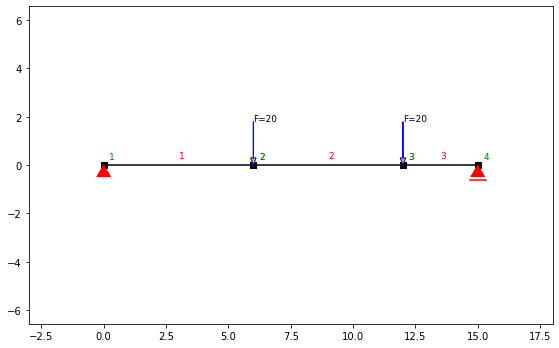

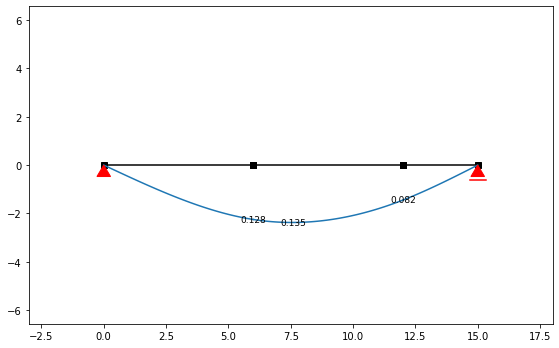

In [ ]:
# importando os pacotes necessários
import numpy as np
import matplotlib.pyplot as plt
from anastruct import SystemElements

#-------------------------------------------------------------------------------
# Informações da estrutura
#-------------------------------------------------------------------------------
node={"A":(0, 0), "C":(6, 0), "D":(12, 0), "B":(15, 0)}

# Define as conectividades entre os nós
conec=[('A', 'C'), ('C', 'D'), ('D', 'B')]

#-------------------------------------------------------------------------------
# Montagem do modelo estrutural
#-------------------------------------------------------------------------------
#  Instancia o sistema estrutural
EA = 70e+7 * 0.012   # kPa*m^2
EI = 70e+7 * 2.25e-5 # kPa*m^4
ss = SystemElements(EA=EA, EI=EI) 
#ss = SystemElements() 

# Implementa a conectividade entre os nós gerando os elementos ou "membros"
for e in conec:
  element = (node[e[0]], node[e[1]])
  ss.add_element(location = element)    # Add um elemento comum entre cada nó conectado

# Define os carregamentos pontuais
F = -20
node_C = ss.find_node_id(node['C'])
node_D = ss.find_node_id(node['D'])
ss.point_load(node_id=node_C, Fy=F) # Add um carregamento ao nó "C" da estrutura
ss.point_load(node_id=node_D, Fy=F) # Add um carregamento ao nó "D" da estrutura

# Apoios
node_id = ss.find_node_id(node['A'])
ss.add_support_hinged(node_id=node_id)
node_id = ss.find_node_id(node['B'])
ss.add_support_roll(node_id=node_id)

#-------------------------------------------------------------------------------
# Solução e resultados do sistema estrutural
#-------------------------------------------------------------------------------
ss.solve()

ss.show_structure(scale=0.7, figsize=(8,5), offset=(0,0))
#ss.show_reaction_force(scale=0.9, figsize=(10,7), offset=(0,1))
#ss.show_axial_force(scale=0.7, figsize=(10,7), offset=(0,0))
#ss.show_shear_force(scale=0.7, figsize=(10,7), offset=(0,0))
#ss.show_bending_moment(scale=0.7, figsize=(8,5), offset=(0,0))
ss.show_displacement(scale=0.7, figsize=(8,5), offset=(0,0))